## Exploratory data Analysis on all batches of FMECA
#### Identifying patterns and trends

In [1]:

import xlwings as xw
import os
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,10)})

Choose the file to explore

In [2]:
#-- All batches combined file
allbatches = 'Allbatches1.xlsx' 
pathAllBatches = 'C:/Users/nisha/OneDrive - Floating Solutions Consulting/Documents/04. Projects/JAD-01 MV Main Deck/03. Working/FMECA/Batch 5 FMECA 2022/FMECA spreadsheets/AN_working'
shtAllBatches = 'Sheet1'
cellRangeAllBatches = 'A1:BP1124'

#-- Batch 5A defined
batch5a = 'FSC-JAD-01-TEC-61-A1 MV FMECA-Batch 5 LBHD - AN.xlsx' 
pathBatch5a = 'C:/Users/nisha/OneDrive - Floating Solutions Consulting/Documents/04. Projects/JAD-01 MV Main Deck/03. Working/FMECA/Batch 5 FMECA 2022/FMECA spreadsheets'
shtBatch5a = '5- 4S WBT FMECA'
cellRangeBatch5a = 'A5:BO514'


#-- Batch 5B defined
batch5b = 'FSC-JAD-01-TEC-61-A1 MV FMECA-Batch 5 LBHD - KCH.xlsx' 
pathBatch5b = 'C:/Users/nisha/OneDrive - Floating Solutions Consulting/Documents/04. Projects/JAD-01 MV Main Deck/03. Working/FMECA/Batch 5 FMECA 2022/FMECA spreadsheets'
shtBatch5b = '5- 4S WBT FMECA'
cellRangeBatch5b = 'A5:BO684'


Function to import dataset

In [4]:
def importdf(nameFile,path,sheet,cellRange):
    file_path = os.path.join(path,nameFile)
    book = xw.Book(file_path)
    sht = book.sheets[sheet]
    rng = sht.range(cellRange)
    df = rng.options(pd.DataFrame, omdex=False, header=True).value
    return df

Importing datasets

In [5]:
df1 = importdf(batch5a,pathBatch5a,shtBatch5a,cellRangeBatch5a)
df2 = importdf(batch5b,pathBatch5b,shtBatch5b,cellRangeBatch5b)

In [7]:
df2.head(1)

,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Assessment notes,Adj Final action
Item No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD- CR-701,AW,FR-48,LL20,LBHD(S),100.0,70.0,FR-49,170.0,LL20,340.0,AH,0.9,15.5,0.2,12.4,13.175,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,12.5,3.0,0.193548,SC,Long'l bhd,Panel,Plate,None,Corrosion,Long'l bhdPanelPlateCorrosion,5.0,7.0,8.0,280.0,None,0.0,Check if Arrest and Monitor is sufficient,No,Arrest & monitor CVI,5.0,3.0,4.0,60.0,None,0.0,0.193548,Local,Med,Med,N,Pit,Tank boundary plating,Substantial or below substantial loss,"Monitor only, coating intact",Scheduled tank inspection,Local corrosion on the longitudinal bulkhead p...,Monitor only


In [8]:
df = pd.concat([df1, df2], axis=0)

In [13]:
df["Anomaly Type"].unique()

array(['AW', 'P', 'CB', 'AC', 'B', 'p', None], dtype=object)

In [14]:
df.head(1)

,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Assessment notes,Adj Final action
Item No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD- CR-192,AW,49-50,LL15,LBHD,4200.0,100.0,FR.49,500.0,LL15,0.0,AH,44.5,13.0,0.2,10.4,11.05,8.0,6.9,8.7,3.7,4.1,7.5,7.9,7.4,7.5,6.2,6.79,3.7,6.21,0.477692,R,Long'l bhd,Panel,Plate,None,Corrosion,Long'l bhdPanelPlateCorrosion,5.0,7.0,8.0,280.0,None,0.0,Investigate further and perform calculation if...,No,Arrest & monitor CVI,5.0,3.0,4.0,60.0,NaN,0.0,0.477692,Local,Med,Med,Y,Generalised corrosion,None,None,None,None,Local Generalised corrosion on the longitudina...,None


Items that require further investigation. <br>
Column name -  Detail

In [14]:
#-- filter 'detail' column == 'investigate'
df1 = df[df['Detail']=='investigate']

c:\Users\nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='(%)'>

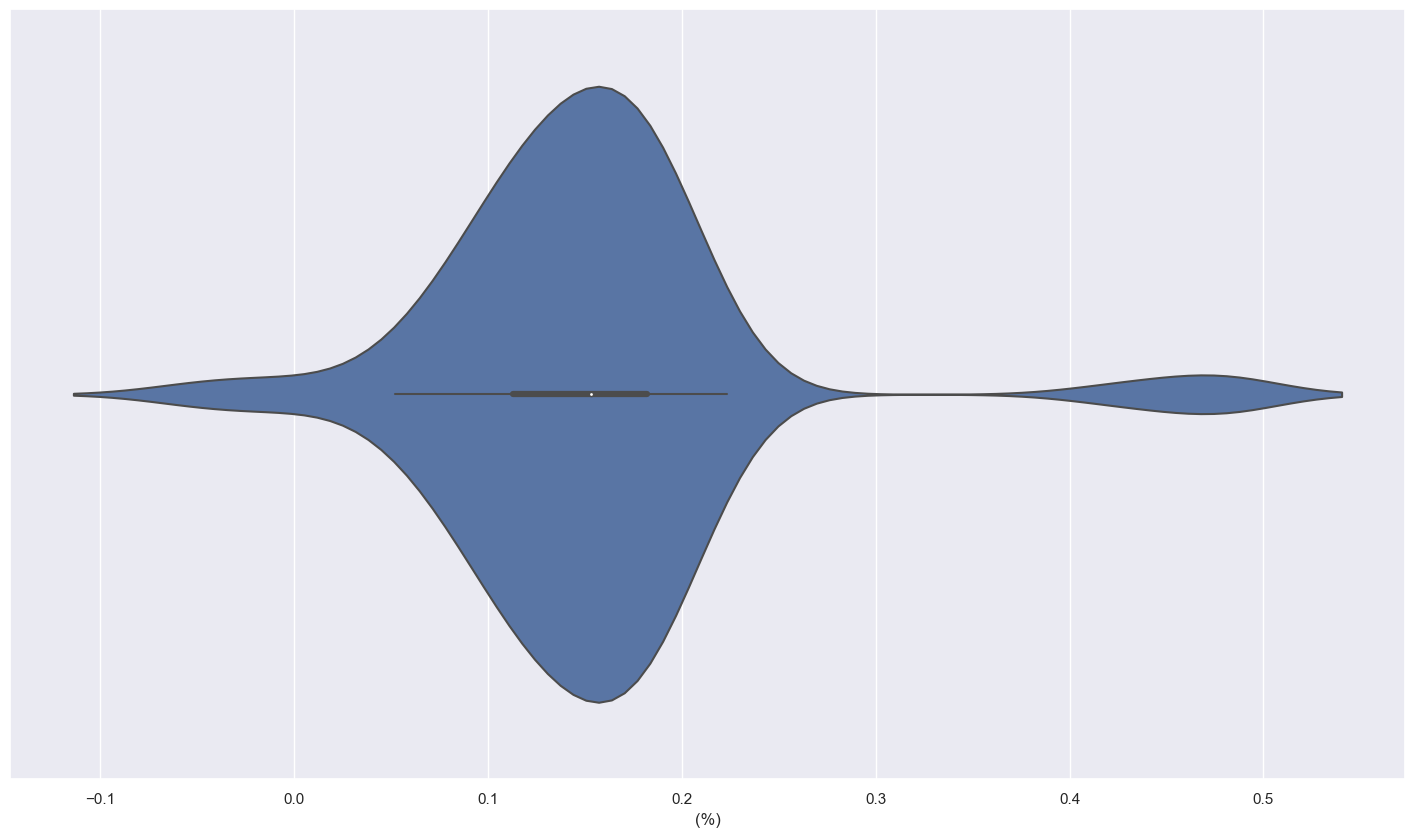

In [22]:
sns.violinplot(df1['(%)'])

In [23]:
df1[df1['(%)']<0]

,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Assessment notes,Adj Final action
Item No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
421.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD- CR-612,CB,FR-48,LL14,LBHD(S),90.0,90.0,FR-48,1580.0,LL14,0.0,AH,0.9,13.5,0.20,10.8,11.475,14.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,14.2,-0.7,-0.051852,None,Long'l bhd,Panel,Plate,None,Pitting,Long'l bhdPanelPlatePitting,8.0,7.0,8.0,448.0,None,0.0,Check if Arrest and Monitor is sufficient,None,Arrest & monitor CVI,8.0,3.0,4.0,96.0,NaN,0.0,-0.051852,None,None,None,None,Pit,Tank boundary plating,investigate,investigate,None,None,None
422.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD- CR-613,CB,FR-48,LL14,LBHD(S),70.0,70.0,FR-49,1650.0,LL14,610.0,AH,0.5,13.5,0.20,10.8,11.475,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,14.1,-0.6,-0.044444,None,Long'l bhd,Panel,Plate,None,Pitting,Long'l bhdPanelPlatePitting,8.0,7.0,8.0,448.0,None,0.0,Check if Arrest and Monitor is sufficient,None,Arrest & monitor CVI,8.0,3.0,4.0,96.0,NaN,0.0,-0.044444,None,None,None,None,Pit,Tank boundary plating,investigate,investigate,None,None,None
439.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD- CR-630,CB,FR-48,LL15,LBHD(S),1750.0,400.0,FR-49,0.0,LL15,0.0,AH,55.0,10.0,0.25,7.5,8.125,10.2,10.1,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2,10.1,-0.2,-0.020000,None,Long'l bhd,Panel,Long'l stiff'r,web,Corrosion,Long'l bhdPanelLong'l stiff'rwebCorrosion,5.0,5.0,8.0,200.0,None,0.0,Check if Arrest and Monitor is sufficient,None,Arrest & monitor CVI,5.0,3.0,4.0,60.0,NaN,0.0,-0.02,None,None,None,None,Generalised corrosion,None,investigate,investigate,None,None,None


<AxesSubplot:>

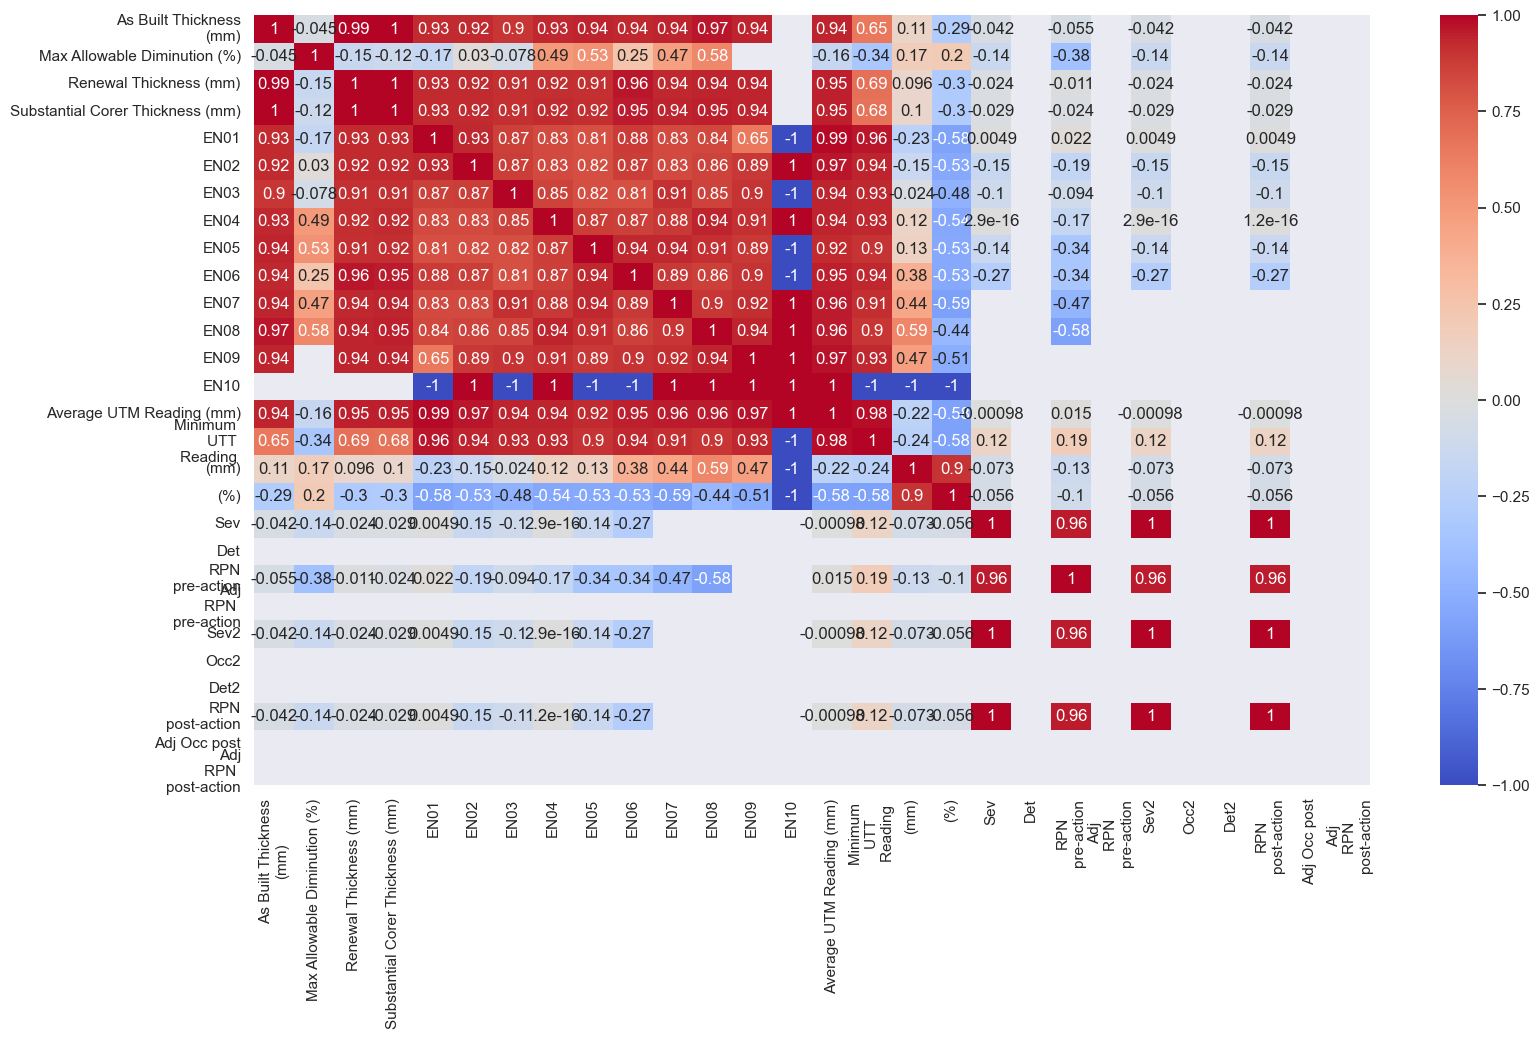

In [21]:
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Repair method')

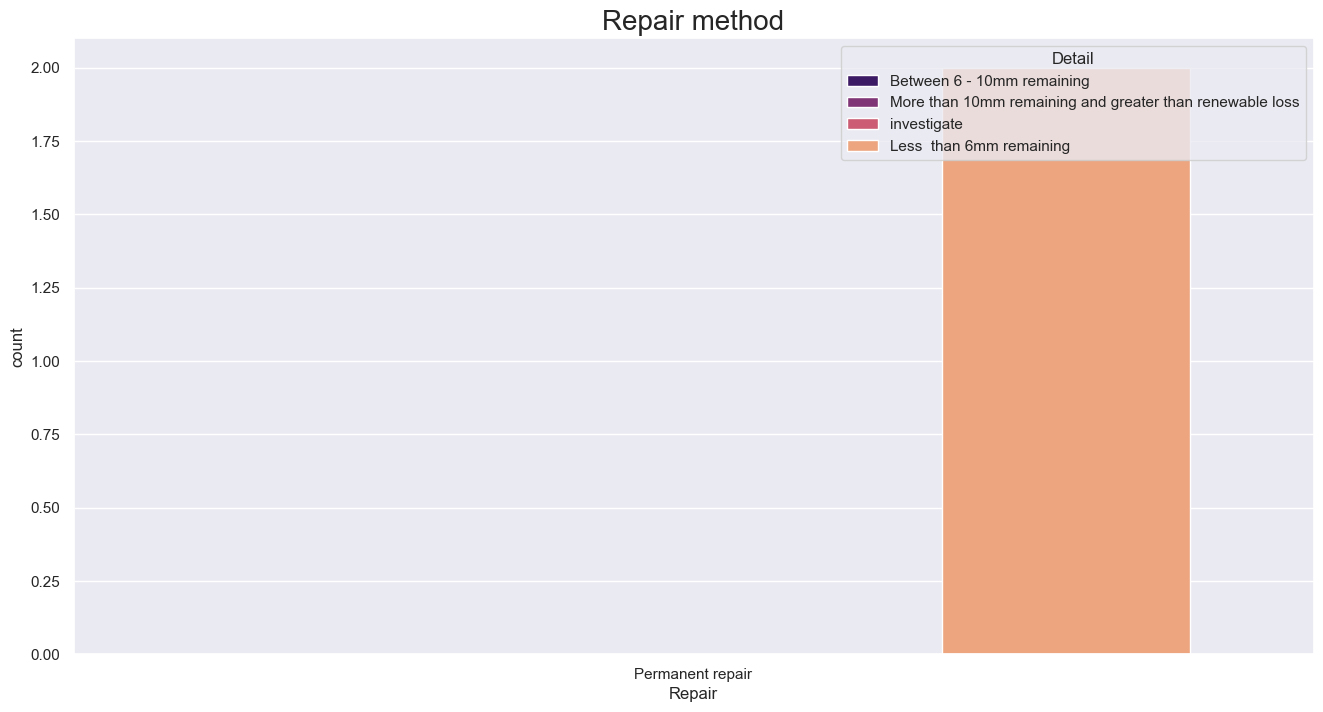

In [26]:
sns.set(rc={'figure.figsize':(16,8)})
a = sns.countplot(x= 'Repair',
hue = 'Detail',
data = df[(df['Final Anomaly description'] == 'Pit within generalised corrosion')],
palette='magma')

a.axes.set_title('Repair method',fontsize=20)


Text(0.5, 1.0, 'Repair vs ')

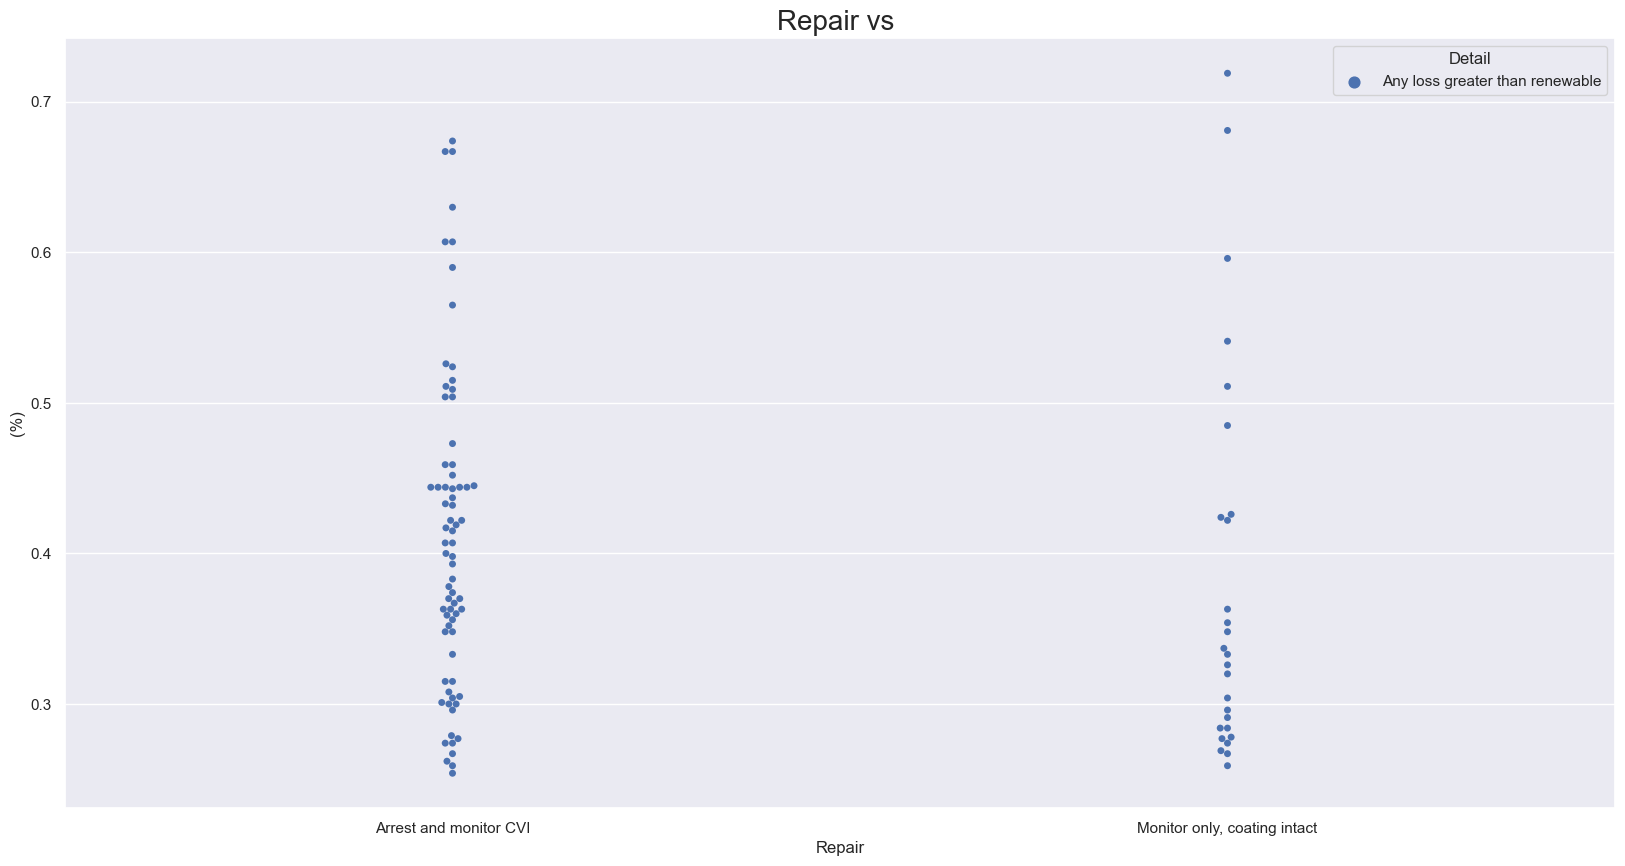

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
a = sns.swarmplot(x= 'Repair',
y = '(%)',
data = df[(df['Location'] == 'Stiffener web') & (df['Detail'] == 'Any loss greater than renewable')],
hue = 'Detail')

a.axes.set_title('Repair vs ',fontsize=20)

In [28]:
df.head(1)

,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Assessment notes,Adj Final action,batch
Item No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD- CR-192,AW,49-50,LL15,LBHD,4200.0,100.0,FR.49,500.0,LL15,0.0,AH,44.5,13.5,0.2,10.8,11.5,8.0,6.9,8.7,3.7,4.1,7.5,7.9,7.4,7.5,6.2,6.8,3.7,6.7,0.497,R,Long'l bhd,Panel,Plate,None,Corrosion,Long'l bhdPanelPlateCorrosion,5.0,7.0,8.0,280.0,None,0.0,Investigate further and perform calculation if...,No,Arrest & monitor CVI,5.0,3.0,4.0,60.0,NaN,0.0,0.497,Local,Med,Med,Y,Generalised corrosion,Tank boundary plating,Between 6 - 10mm remaining,Permanent repair,Scheduled tank inspection,Local pitting on longitudinal bulkhead plating...,Permanent repair,5.0


In [29]:
df_rest = df[df['batch'] != 5]

In [30]:
df_5a = df[df['batch'] == 5]

In [31]:
#xw.view(df_rest.groupby(['Repair']).count())

In [32]:
xw.view(df_5a.groupby(['Repair']).count())

In [33]:
df['Repair'].unique()

array(['Permanent repair', None, 'Arrest and monitor CVI',
       'Monitor only, coating intact'], dtype=object)